# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
html = browser.html

In [5]:
# Create a Beautiful Soup 
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')
rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
from pprint import pprint

In [8]:
# Create an empty list
mars_weather = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all(['th', 'td'])
    cell_data = [cell.get_text(strip=True) for cell in cells]
    mars_weather.append(cell_data)

pprint(mars_weather)

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165'

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = mars_weather[0]
data = mars_weather[1:]

mars_weather_df = pd.DataFrame(data, columns=columns)
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis

# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert other columns to their respective types
mars_weather_df = mars_weather_df.astype({
    'sol': 'int32',
    'ls': 'int32',
    'month': 'int32',
    'min_temp': 'float64',
    'pressure': 'float64'
})

In [13]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
number_of_months = mars_weather_df["month"].nunique()
number_of_months

12

In [15]:
# 2. How many sols (Martian days) worth of data are there?
number_of_martian_days = mars_weather_df["terrestrial_date"].nunique()
number_of_martian_days

1867

In [16]:
# 3. What is the average minimum temperature by month?
average_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()
average_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [17]:
coldest_average_month_temp = average_min_temp.min()
coldest_average_month_temp

-83.30729166666667

In [18]:
coldest_average_month_index = average_min_temp.idxmin()
coldest_average_month_index

3

In [19]:
warmest_average_month_temp = average_min_temp.max()
warmest_average_month_temp

-68.38297872340425

In [20]:
warmest_average_month_index = average_min_temp.idxmax()
warmest_average_month_index 

8

In [21]:
print(f' The month with the coldest average temperature is month {coldest_average_month_index} with a temperature of {coldest_average_month_temp} degrees Celsius.') 
print(f' The month with the warmest average temperature is month {warmest_average_month_index} with a temperature of {warmest_average_month_temp} degrees Celsius.')

 The month with the coldest average temperature is month 3 with a temperature of -83.30729166666667 degrees Celsius.
 The month with the warmest average temperature is month 8 with a temperature of -68.38297872340425 degrees Celsius.


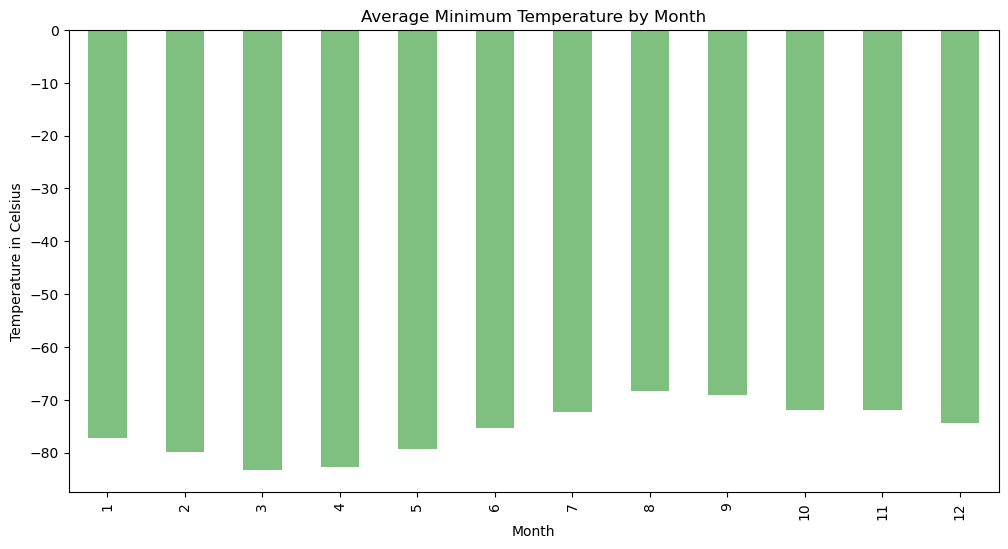

In [22]:
# Plot the average minimum temperature by month
average_min_temp.plot(kind="bar", alpha=0.5, color='green', figsize=(12,6))
plt.title("Average Minimum Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.show()

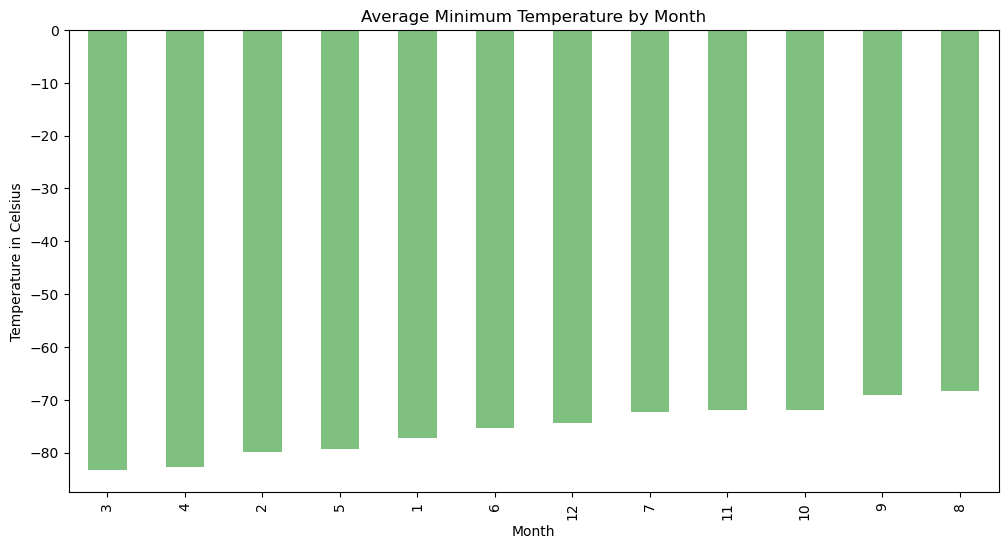

In [23]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_average_min_temp = average_min_temp.sort_values()
sorted_average_min_temp.plot(kind='bar', alpha=.5, color='green', figsize=(12,6))
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [24]:
# 4. What is the average pressure by month?
avg_pressure_month = mars_weather_df.groupby('month')['pressure'].mean()
avg_pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [25]:
average_pressure_max = avg_pressure_month.max()
average_pressure_max

913.3059701492538

In [26]:
average_pressure_month_max = avg_pressure_month.idxmax()
average_pressure_month_max

9

In [27]:
average_pressure_min = avg_pressure_month.min()
average_pressure_min

745.0544217687075

In [28]:
average_pressure_month_min = avg_pressure_month.idxmin()
average_pressure_month_min

6

In [29]:
print(f' The month with the lowest average atmospheric pressure is month {average_pressure_month_max} with a pressure of {average_pressure_min}.') 
print(f' The month with the highest average atmospheric prssure is month {average_pressure_month_min} with a temperature of {average_pressure_max}.')

 The month with the lowest average atmospheric pressure is month 9 with a pressure of 745.0544217687075.
 The month with the highest average atmospheric prssure is month 6 with a temperature of 913.3059701492538.


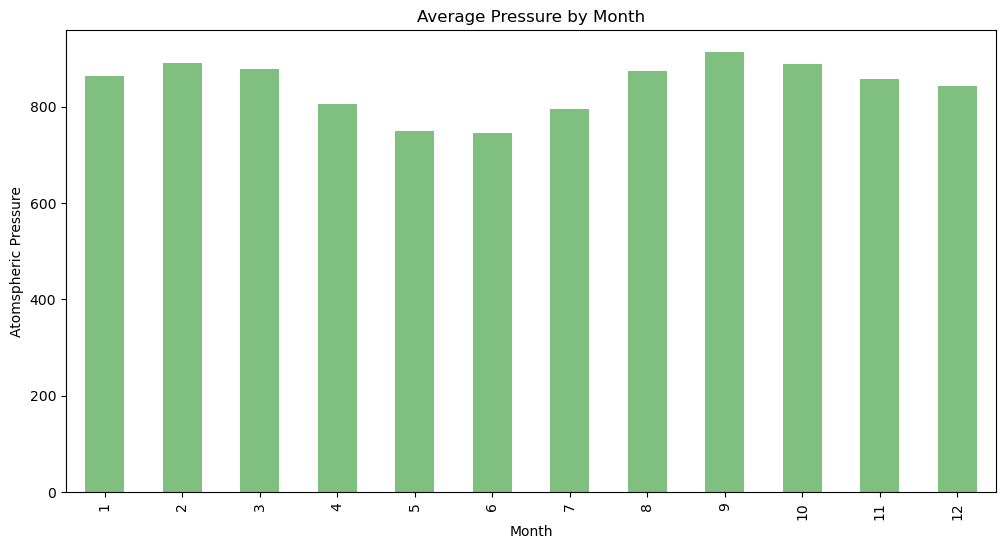

In [30]:
# Plot the average pressure by month
avg_pressure_month.plot(kind="bar", alpha=.5, color='green', figsize=(12,6))
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atomspheric Pressure')
plt.show()

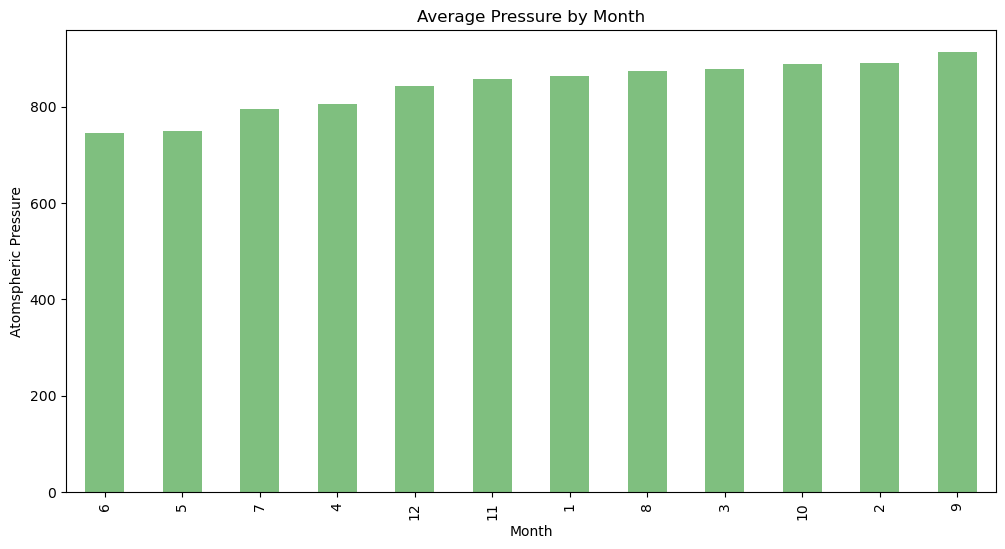

In [31]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_average_pressure_month = avg_pressure_month.sort_values()
sorted_average_pressure_month.plot(kind='bar', alpha=.5, color='green', figsize=(12,6))
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atomspheric Pressure')
plt.show()

In [32]:
import numpy as np

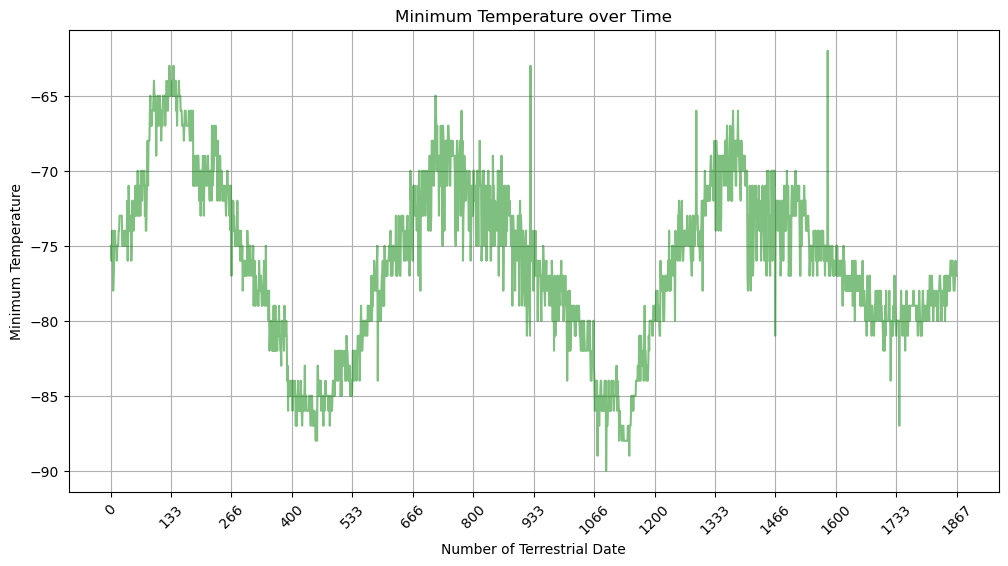

In [33]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
x_axis = range(number_of_martian_days)

plt.figure(figsize=(12, 6))
plt.xticks(ticks=np.linspace(0, number_of_martian_days, num=15, dtype=int), rotation=45)
plt.plot(x_axis, mars_weather_df['min_temp'], color='green', alpha=.5)
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of Terrestrial Date')
plt.ylabel('Minimum Temperature')
plt.grid()
plt.show()

#### Minimum Temperature

After completing the initial analysis of extrapolating the rows and data from the table and creating the data frame, I used simple pandas functions to calculate and visually display the average minimum temperature for each month on Mars. After viewing the table linearly and visually via the Jupyter Notebook and MatPlotLin graph, along with the integrated index function it appears as if the third month has the coldest average temperature with an average temperature of around -83 degrees Celsius, and the warmest month appears to be the eighth month with an average temperature of around -68 degrees Celsius. 

#### Atmospheric Pressure

After applying the same concepts and principles used when calculating the average monthly temperature, the average atmospheric pressure is much of the same. Using the same methods as above it seems as if the month with the lowest atmospheric pressure is the sixth month with an average pressure of about 745 ATM and the month with the highest is month 9 with an average pressure of about 913 ATM.

#### Year Length

After calculating and visualizing the minimum daily temperature on Mars for the duration of the data there seems to be around 680 days on Mars for the planet to complete one rotation around the Sun. The simplest way to arrive at this conclusion is to analyze the trends of the daily temperature data on the graph and identify where the data seems to complete a cycle returning to the initial position while beginning to start a similar pattern. On the graph, the introductory value at point 0 and the point a little after the 670-day milestone appear to be where the cycle begins to repeat itself and the same goes for the remainder of the dataset. A Google search defines one year on Mars to be exactly 687 days which validates the findings from the graph. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [34]:
# Write the data to a CSV
hw_filepath = 'mars_temperature_data.csv'
mars_weather_df.to_csv(hw_filepath)

In [35]:
browser.quit()